# 03 - Gelişmiş Görselleştirmeler

Bu dosya, 2025 Yazılım Sektoru Maas Anketi analizi icin gelismis gorsellestirmeler olusturur

## Hedefler:
- Korelasyon ve teknoloji analizi icin isi haritaları olusturmak
- Kariyer gelisimi icin Sankey diyagramlari olusturmak
- Bar plots ve violin plots uretmek

## Kütüphaneleri İçe Aktarın ve Verileri Yükleyin

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Set up plotting style
sns.set_palette("husl")
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")

# Constants
FIG_DIR = '../figures'
LOCATION_NOTE = 'Note: Estimated location is inferred from company location and work mode (Office/Hybrid → company location). Not definitive.'

# Load processed data
df = pd.read_pickle('../data/processed_dataframe.pkl')
print(f'Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns')

Dataset loaded: 2969 rows, 94 columns


## Heatmaps: Teknoloji ve Korelasyon Analizi

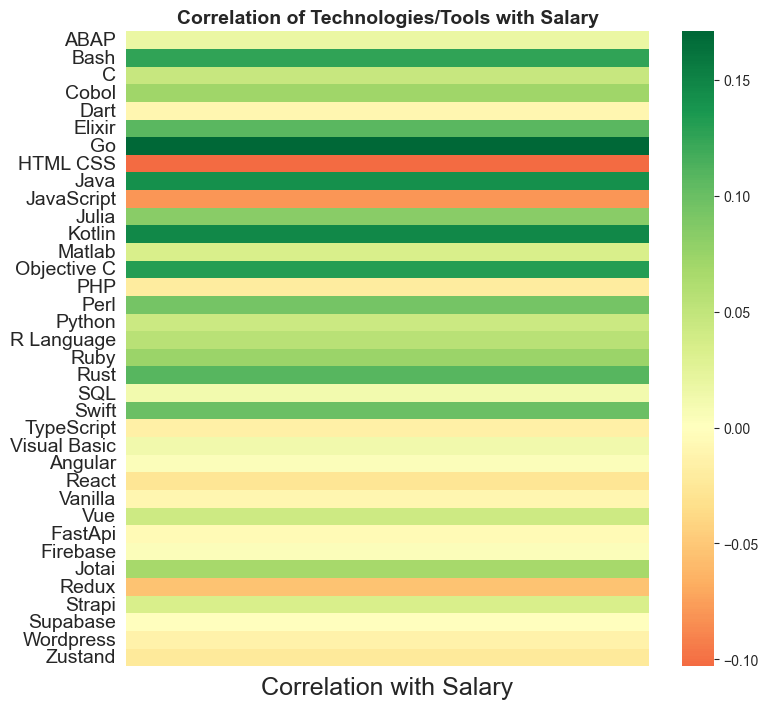

Top 15 Technology Correlations with Salary (Graph):


,Technology,Correlation
6,Go,0.171
11,Kotlin,0.147
8,Java,0.142
13,Objective C,0.131
1,Bash,0.126
19,Rust,0.108
5,Elixir,0.108
7,HTML CSS,-0.103
21,Swift,0.099
15,Perl,0.095



All Technology Correlations with Salary:


,Technology,Correlation
6,Go,0.171
11,Kotlin,0.147
8,Java,0.142
13,Objective C,0.131
1,Bash,0.126
19,Rust,0.108
5,Elixir,0.108
7,HTML CSS,-0.103
21,Swift,0.099
15,Perl,0.095


In [36]:
# Technology/Tools vs Salary correlation heatmap
tech_cols = [c for c in df.columns if c.startswith('programming_') or c.startswith('frontend_') or c.startswith('tools_')]

# Exclude "Hicbiri" and "Kullanmiyorum"
exclude_cols = ['programming_Hicbiri', 'frontend_Kullanmiyorum', 'tools_Kullanmiyorum']
filtered_tech_cols = [c for c in tech_cols if c not in exclude_cols]

if filtered_tech_cols:
    corr_rows = []
    index = []
    for c in filtered_tech_cols:
        if df[c].nunique() > 1:
            corr = df[[c, 'salary_numeric']].corr().iloc[0, 1]
            corr_rows.append([corr])
            # Remove prefixes and clean names for plotting
            cleaned_name = c.replace('programming_', '').replace('frontend_', '').replace('tools_', '').replace('_', ' ')
            index.append(cleaned_name)
    
    if corr_rows:
        mat = np.array(corr_rows)
        plt.figure(figsize=(8, max(6, len(index) * 0.2)))
        sns.heatmap(mat, annot=False, cmap='RdYlGn', center=0, yticklabels=index, xticklabels=['Correlation with Salary'])
        plt.title('Correlation of Technologies/Tools with Salary', fontsize=14, fontweight='bold')

        plt.xticks(fontsize=18)
        plt.yticks(fontsize=14)

        plt.tight_layout()
        plt.savefig(os.path.join(FIG_DIR, 'heatmap_tech_tool_salary.png'), dpi=300, bbox_inches='tight')
        plt.show()

        # Display top correlations
        tech_corr_df = pd.DataFrame({
            'Technology': index,
            'Correlation': [row[0] for row in corr_rows]
        }).sort_values('Correlation', key=abs, ascending=False).head(15)
        print("Top 15 Technology Correlations with Salary (Graph):")
        display(tech_corr_df.round(3))

        # Display all correlations
        all_tech_corr_df = pd.DataFrame({
            'Technology': index,
            'Correlation': [row[0] for row in corr_rows]
        }).sort_values('Correlation', key=abs, ascending=False)
        print("\nAll Technology Correlations with Salary:")
        display(all_tech_corr_df.round(3))

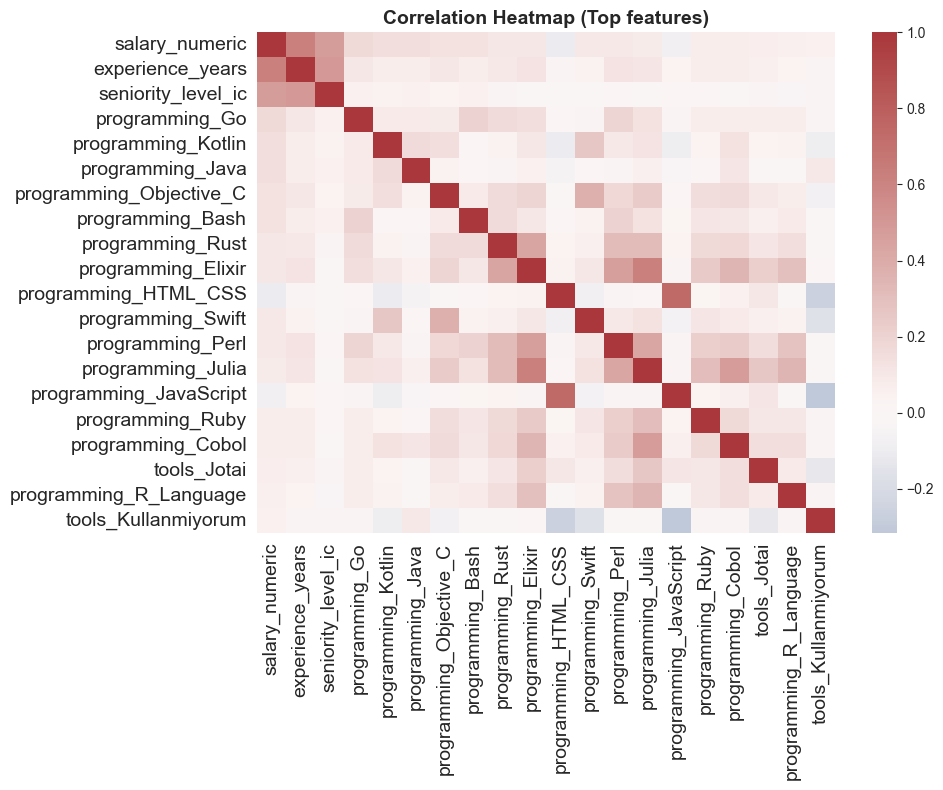

Top 15 Feature Correlations with Salary (Graph):


,Feature,Correlation
0,salary_numeric,1.000
1,experience_years,0.623
2,seniority_level_ic,0.474
3,programming_Go,0.171
4,programming_Kotlin,0.147
5,programming_Java,0.142
6,programming_Objective_C,0.131
7,programming_Bash,0.126
8,programming_Rust,0.108
9,programming_Elixir,0.108



All Feature Correlations with Salary:


,Feature,Correlation
0,salary_numeric,1.000
1,experience_years,0.623
2,seniority_level_ic,0.474
3,programming_Go,0.171
4,programming_Kotlin,0.147
5,programming_Java,0.142
6,programming_Objective_C,0.131
7,programming_Bash,0.126
8,programming_Rust,0.108
9,programming_Elixir,0.108


In [26]:
# General correlation heatmap
base_cols = [c for c in ['salary_numeric', 'experience_years', 'seniority_level_ic'] if c in df.columns]
tech_cols = [c for c in df.columns if c.startswith('programming_') or c.startswith('frontend_') or c.startswith('tools_')]
cols = base_cols + tech_cols

if 'salary_numeric' in cols:
    sub = df[cols].copy()
    keep = [c for c in sub.columns if sub[c].nunique() > 1]
    sub = sub[keep]
    
    if sub.shape[1] >= 3:
        corr = sub.corr()
        if 'salary_numeric' in corr.columns:
            target = corr['salary_numeric'].abs().sort_values(ascending=False)
            top_cols = target.index[:20].tolist()
            corr_top = corr.loc[top_cols, top_cols]
            
            plt.figure(figsize=(10, 8))
            sns.heatmap(corr_top, cmap='vlag', center=0, annot=False)
            plt.title('Correlation Heatmap (Top features)', fontsize=14, fontweight='bold')

            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)

            plt.tight_layout()
            plt.savefig(os.path.join(FIG_DIR, 'heatmap_correlation.png'), dpi=300, bbox_inches='tight')
            plt.show()
            
            # Display top correlations
            top_corr_df = pd.DataFrame({
                'Feature': target.index[:15],
                'Correlation': target.values[:15]
            })
            print("Top 15 Feature Correlations with Salary (Graph):")
            display(top_corr_df.round(3))
            
            # Display all correlations
            all_corr_df = pd.DataFrame({
                'Feature': target.index,
                'Correlation': target.values
            })
            print("\nAll Feature Correlations with Salary:")
            display(all_corr_df.round(3))

## Sankey Diagram: Kariyer Seviyesi ve Rol Dağılımı

In [16]:
# Create Sankey diagram for career level to role distribution
level_map = {
    0: 'Management', 1: 'Junior', 2: 'Mid', 3: 'Senior', 4: 'Staff Engineer', 5: 'Team Lead', 6: 'Architect'
}
role_cols = [c for c in df.columns if c.startswith('role_')]

# Count flows from level to each role
flows = []
for lvl, lvl_name in level_map.items():
    subset = df[df['seniority_level_ic'] == lvl]
    if not subset.empty:
        for rc in role_cols:
            role_name = rc.replace('role_', '').replace('_', ' ')
            count = int((subset[rc] == 1).sum())
            if count > 0:
                flows.append((lvl_name, role_name, count))

if flows:
    levels = sorted(list({f[0] for f in flows}), key=lambda x: list(level_map.values()).index(x))
    roles = sorted(list({f[1] for f in flows}))
    nodes = levels + roles
    node_index = {n: i for i, n in enumerate(nodes)}

    source = [node_index[s] for s, _, _ in flows]
    target = [node_index[t] for _, t, _ in flows]
    value = [v for _, _, v in flows]

    fig = go.Figure(data=[go.Sankey(
        node=dict(pad=15, thickness=18, line=dict(color='black', width=0.5), label=nodes),
        link=dict(source=source, target=target, value=value)
    )])
    fig.update_layout(title_text='Career Level to Role Distribution (Sankey)', font_size=12)

    # Save interactive HTML
    html_path = os.path.join(FIG_DIR, 'sankey_career_level_role.html')
    fig.write_html(html_path)
    
    # Try to save static image
    try:
        fig.write_image(os.path.join(FIG_DIR, 'sankey_career_level_role.png'), scale=2)
        print("Sankey diagram saved as both HTML and PNG")
    except Exception:
        print("Sankey diagram saved as HTML (PNG export requires kaleido)")
    
    # Display flow summary
    flow_df = pd.DataFrame(flows, columns=['Career Level', 'Role', 'Count'])
    flow_df = flow_df.sort_values('Count', ascending=False).head(20)
    print("Top 20 Career Level to Role Flows (Graph):")
    display(flow_df)
    
    # Display all flows
    all_flow_df = pd.DataFrame(flows, columns=['Career Level', 'Role', 'Count'])
    all_flow_df = all_flow_df.sort_values('Count', ascending=False)
    print("\nAll Career Level to Role Flows:")
    display(all_flow_df)

Sankey diagram saved as both HTML and PNG
Top 20 Career Level to Role Flows (Graph):


,Career Level,Role,Count
56,Mid,Fullstack,310
31,Junior,Fullstack,204
45,Mid,Backend,198
81,Senior,Fullstack,187
55,Mid,Frontend,173
71,Senior,Backend,160
80,Senior,Frontend,111
20,Junior,Backend,105
30,Junior,Frontend,89
115,Team Lead,Fullstack,46



All Career Level to Role Flows:


,Career Level,Role,Count
56,Mid,Fullstack,310
31,Junior,Fullstack,204
45,Mid,Backend,198
81,Senior,Fullstack,187
55,Mid,Frontend,173
...,...,...,...
96,Staff Engineer,DevOps,1
97,Staff Engineer,Frontend,1
99,Staff Engineer,IT Specialist,1
119,Team Lead,Manuel Tester,1


## Saatlik Katılım Analizi

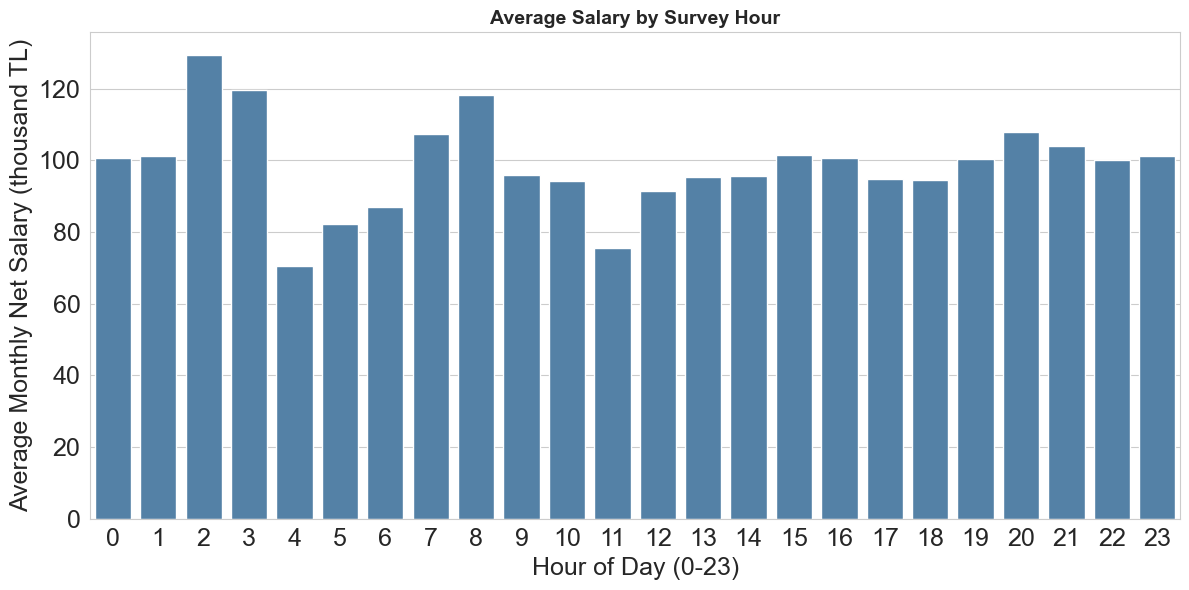

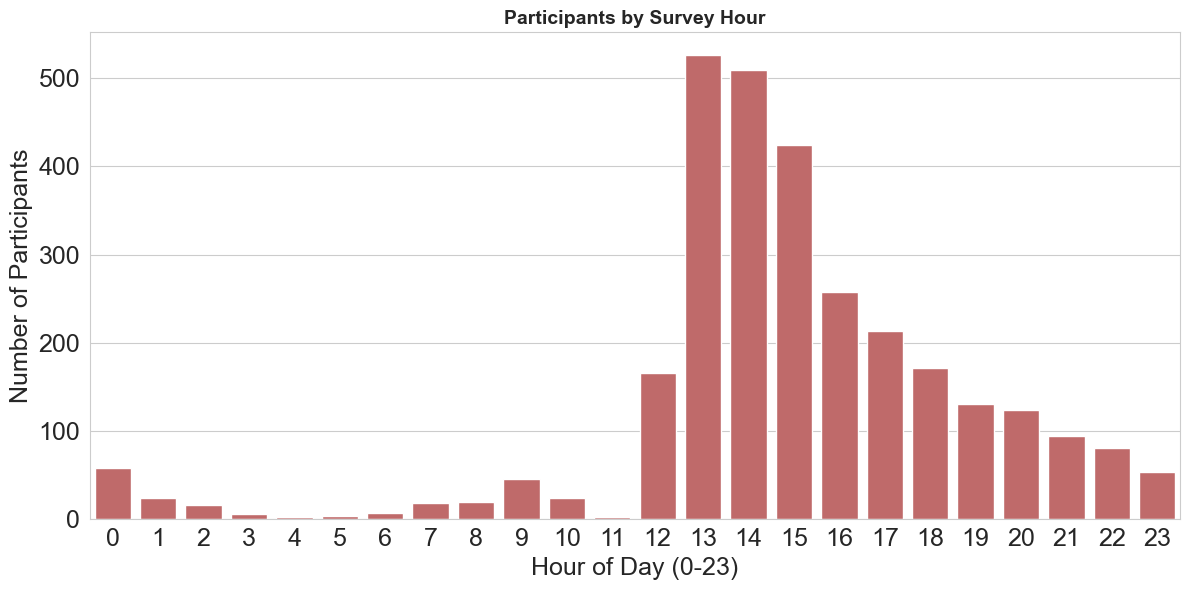

Hourly Participation Statistics:


,hour,avg_salary,participants
0,0,100.7,58
1,1,101.3,24
2,2,129.2,16
3,3,119.5,5
4,4,70.5,2
5,5,82.2,3
6,6,86.9,7
7,7,107.4,18
8,8,118.1,19
9,9,95.8,45


In [27]:
# Extract hour from timestamp
df['hour'] = pd.to_datetime(df['timestamp']).dt.hour

# Average salary by hour
hourly = df.groupby('hour', as_index=False).agg(
    avg_salary=('salary_numeric', 'mean'),
    participants=('salary_numeric', 'size')
)

# Average salary by hour bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly, x='hour', y='avg_salary', color='steelblue')
plt.title('Average Salary by Survey Hour', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (0-23)', fontsize=18)
plt.ylabel('Average Monthly Net Salary (thousand TL)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'barplot_hourly_avg_salary.png'), dpi=300, bbox_inches='tight')
plt.show()

# Participants count by hour
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly, x='hour', y='participants', color='indianred')
plt.title('Participants by Survey Hour', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (0-23)', fontsize=18)
plt.ylabel('Number of Participants', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, 'barplot_hourly_participants.png'), dpi=300, bbox_inches='tight')
plt.show()

# Display hourly statistics
print("Hourly Participation Statistics:")
display(hourly.round(1))

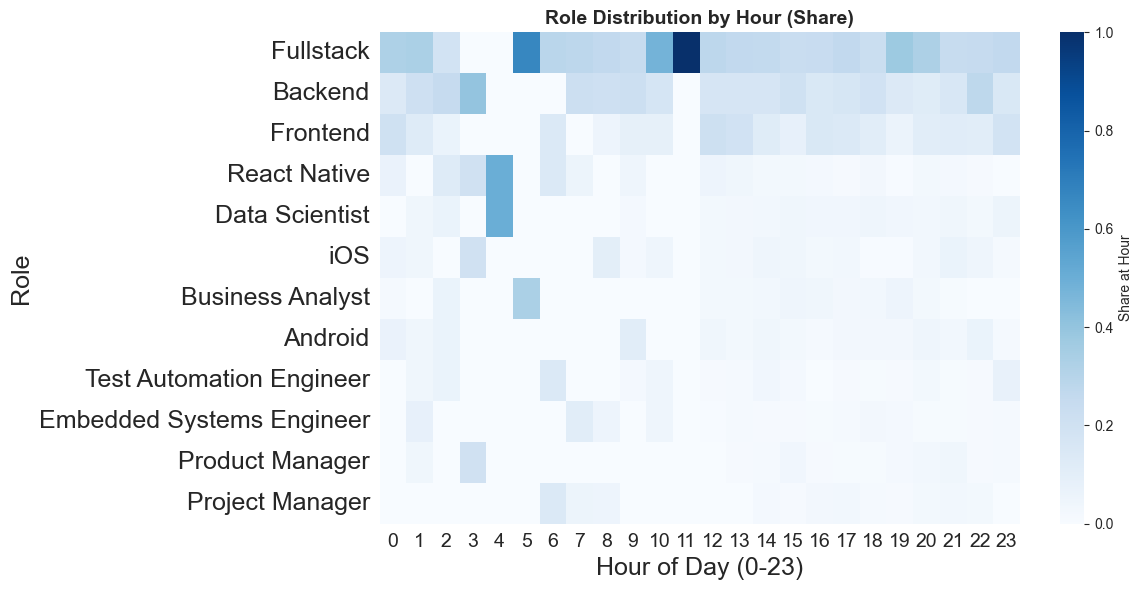

Top 10 Roles by Average Hourly Share (Graph):


,Role,Average Share
0,Fullstack,0.304
1,Backend,0.162
2,Frontend,0.099
3,React Native,0.059
4,Data Scientist,0.045
5,iOS,0.035
6,Business Analyst,0.031
7,Android,0.029
8,Test Automation Engineer,0.024
9,Embedded Systems Engineer,0.020



All Roles by Average Hourly Share:


,Role,Average Share
0,Fullstack,0.304
1,Backend,0.162
2,Frontend,0.099
3,React Native,0.059
4,Data Scientist,0.045
5,iOS,0.035
6,Business Analyst,0.031
7,Android,0.029
8,Test Automation Engineer,0.024
9,Embedded Systems Engineer,0.020


In [30]:
# Role distribution heatmap by hour
role_cols = [c for c in df.columns if c.startswith('role_')]
if role_cols:
    role_long = []
    for rc in role_cols:
        rname = rc.replace('role_', '').replace('_', ' ')
        tmp = df.groupby('hour')[rc].mean()
        role_long.append(tmp.rename(rname))
    
    role_mat = pd.concat(role_long, axis=1).fillna(0.0)
    top_roles = role_mat.mean().sort_values(ascending=False).head(12).index
    role_mat = role_mat[top_roles]
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(role_mat.T, cmap='Blues', cbar_kws={'label': 'Share at Hour'})
    plt.title('Role Distribution by Hour (Share)', fontsize=14, fontweight='bold')
    plt.xlabel('Hour of Day (0-23)', fontsize=18)
    plt.ylabel('Role', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.savefig(os.path.join(FIG_DIR, 'heatmap_roles_by_hour.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    # Display role distribution summary
    role_hour_summary = role_mat.mean().sort_values(ascending=False).head(10)
    print("Top 10 Roles by Average Hourly Share (Graph):")
    display(pd.DataFrame({
        'Role': role_hour_summary.index,
        'Average Share': role_hour_summary.values
    }).round(3))
    
    # Display all roles
    all_role_hour_summary = role_mat.mean().sort_values(ascending=False)
    print("\nAll Roles by Average Hourly Share:")
    display(pd.DataFrame({
        'Role': all_role_hour_summary.index,
        'Average Share': all_role_hour_summary.values
    }).round(3))

## Kariyer Gelişimi Analizi

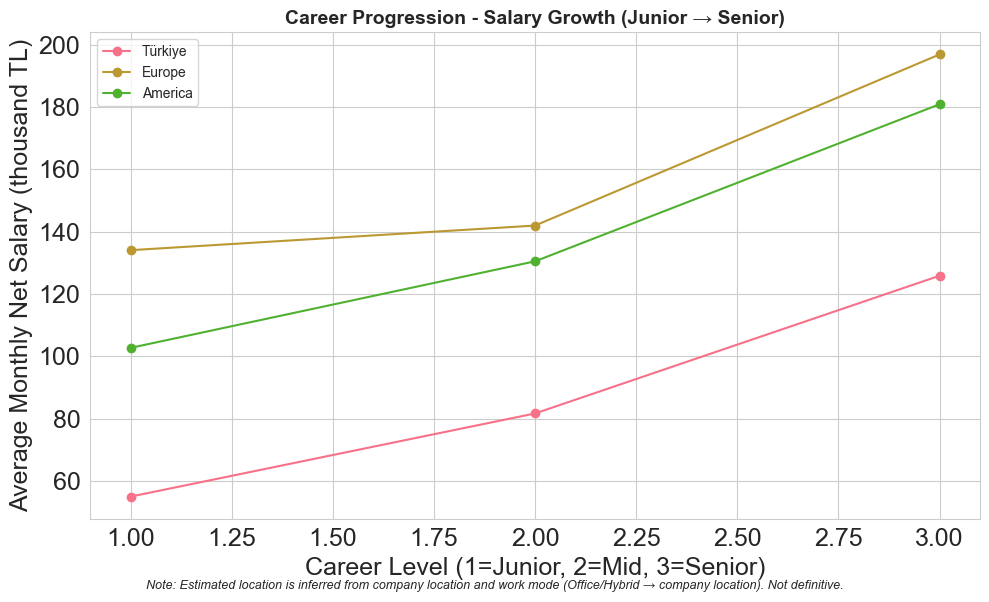

Career Progression by Location:


,Location,Junior,Mid,Senior
0,Türkiye,52.4,80.6,124.6
1,Europe,112.2,130.7,194.3
2,America,102.7,130.5,180.9


In [31]:
# Career progression salary growth line plot
has_likely = 'is_likely_in_company_location' in df.columns
subset = df[df['seniority_level_ic'].isin([1, 2, 3])]
if has_likely:
    subset = subset[subset['is_likely_in_company_location'] == 1]

if not subset.empty:
    loc_map = {
        'Turkiye': 'Türkiye',
        'Avrupa': 'Europe',
        'Amerika': 'America'
    }
    
    plt.figure(figsize=(10, 6))
    has_any = False
    
    for raw, label in loc_map.items():
        col = f'company_location_{raw}'
        if col in df.columns:
            grp = subset[subset[col] == 1].groupby('seniority_level_ic')['salary_numeric'].mean()
            x = [1, 2, 3]
            y = [grp.get(1, np.nan), grp.get(2, np.nan), grp.get(3, np.nan)]
            
            if any(np.isnan(y)):
                grp2 = df[(df[col] == 1) & (df['seniority_level_ic'].isin([1, 2, 3]))].groupby('seniority_level_ic')['salary_numeric'].mean()
                y = [grp2.get(1, y[0]), grp2.get(2, y[1]), grp2.get(3, y[2])]
            
            if not np.all(np.isnan(y)):
                plt.plot(x, y, marker='o', label=label)
                has_any = True
    
    if has_any:
        plt.title('Career Progression - Salary Growth (Junior → Senior)', fontsize=14, fontweight='bold')
        plt.xlabel('Career Level (1=Junior, 2=Mid, 3=Senior)', fontsize=18)
        plt.ylabel('Average Monthly Net Salary (thousand TL)', fontsize=18)
        plt.legend()
        plt.figtext(0.5, 0.01, LOCATION_NOTE, ha='center', fontsize=9, style='italic')

        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        
        plt.tight_layout()
        plt.savefig(os.path.join(FIG_DIR, 'line_career_progression_salary_growth.png'), dpi=300, bbox_inches='tight')
        plt.show()
        
        # Display career progression data
        career_prog_data = []
        for raw, label in loc_map.items():
            col = f'company_location_{raw}'
            if col in df.columns:
                grp = df[(df[col] == 1) & (df['seniority_level_ic'].isin([1, 2, 3]))].groupby('seniority_level_ic')['salary_numeric'].mean()
                career_prog_data.append({
                    'Location': label,
                    'Junior': grp.get(1, np.nan),
                    'Mid': grp.get(2, np.nan),
                    'Senior': grp.get(3, np.nan)
                })
        
        if career_prog_data:
            career_prog_df = pd.DataFrame(career_prog_data).round(1)
            print("Career Progression by Location:")
            display(career_prog_df)

## Gelişmiş Bar Plots ve Özel Görselleştirmeler

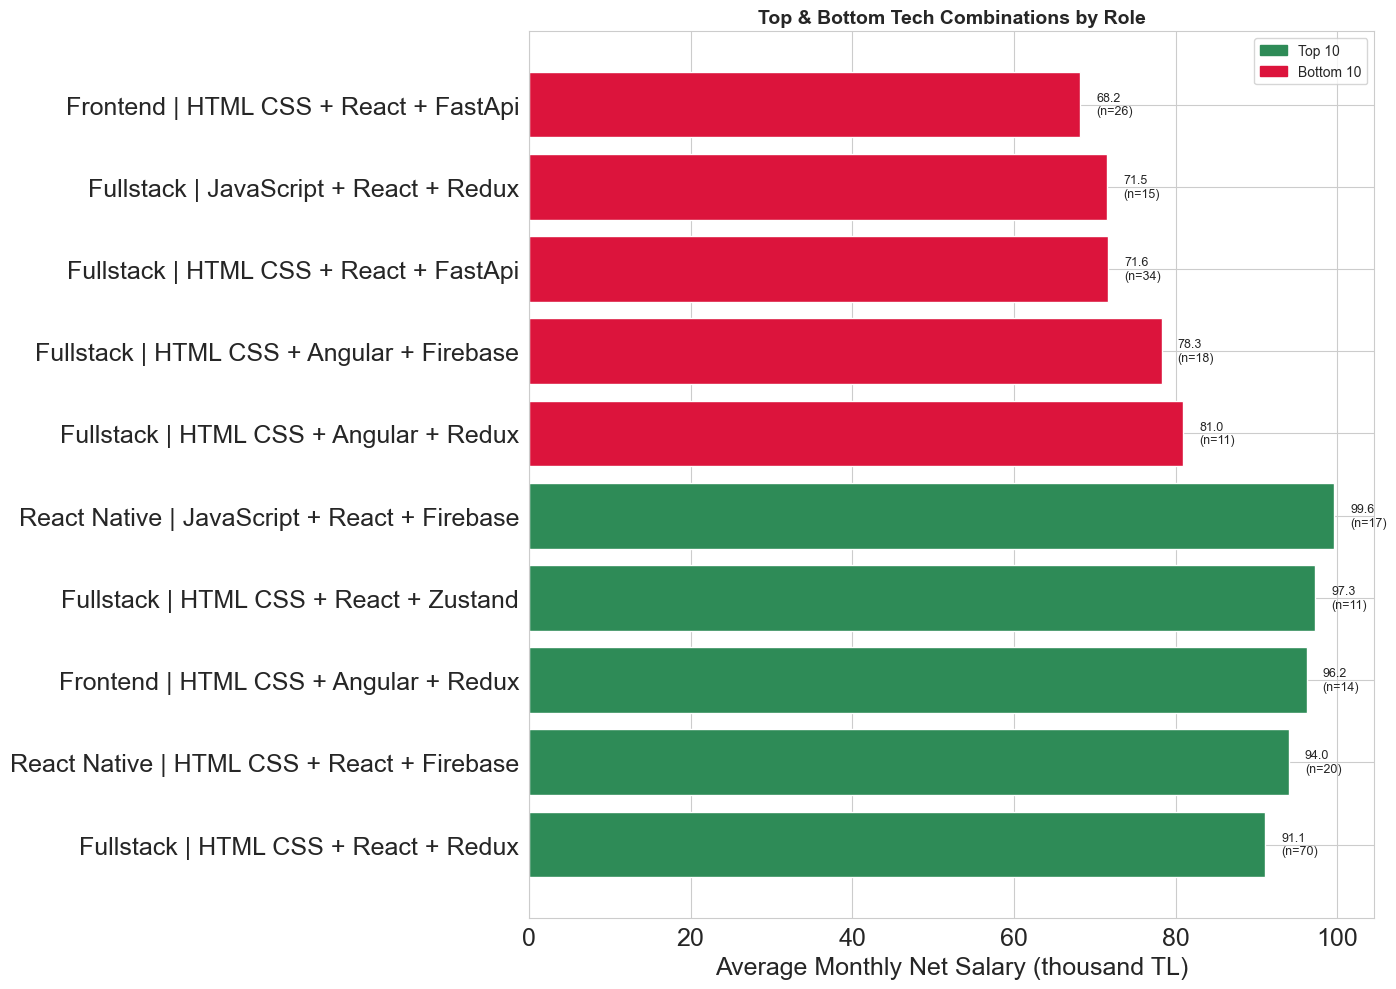

Top & Bottom Tech Combinations by Role (Graph):


,Role | Tech Stack,Average Salary,Count,Category
0,Frontend | HTML CSS + React + FastApi,68.2,26,Bottom
1,Fullstack | JavaScript + React + Redux,71.5,15,Bottom
2,Fullstack | HTML CSS + React + FastApi,71.6,34,Bottom
3,Fullstack | HTML CSS + Angular + Firebase,78.3,18,Bottom
4,Fullstack | HTML CSS + Angular + Redux,81.0,11,Bottom
5,React Native | JavaScript + React + Firebase,99.6,17,Top
6,Fullstack | HTML CSS + React + Zustand,97.3,11,Top
7,Frontend | HTML CSS + Angular + Redux,96.2,14,Top
8,React Native | HTML CSS + React + Firebase,94.0,20,Top
9,Fullstack | HTML CSS + React + Redux,91.1,70,Top



All Tech Combinations by Role:


,Role | Tech Stack,Average Salary,Count
0,React Native | JavaScript + React + Firebase,99.6,17
1,Fullstack | HTML CSS + React + Zustand,97.3,11
2,Frontend | HTML CSS + Angular + Redux,96.2,14
3,React Native | HTML CSS + React + Firebase,94.0,20
4,Fullstack | HTML CSS + React + Redux,91.1,70
5,Frontend | HTML CSS + React + Zustand,88.8,21
6,Frontend | HTML CSS + React + Redux,85.2,121
7,Frontend | HTML CSS + React + Firebase,82.9,50
8,Fullstack | HTML CSS + React + Firebase,82.4,45
9,Fullstack | HTML CSS + Angular + Redux,81.0,11


In [32]:
# Top tech combinations by role
role_cols = [c for c in df.columns if c.startswith('role_')]
prog_cols = [c for c in df.columns if c.startswith('programming_') and c != 'programming_Hicbiri']
fe_cols = [c for c in df.columns if c.startswith('frontend_') and c != 'frontend_Kullanmiyorum']
tool_cols = [c for c in df.columns if c.startswith('tools_') and not c.endswith('Kullanmiyorum')]

if role_cols and (prog_cols or fe_cols or tool_cols):
    def pick_first_true(cols, row):
        for c in cols:
            try:
                if row[c] == 1:
                    return c
            except KeyError:
                continue
        return ''

    records = []
    for _, row in df.iterrows():
        role_c = pick_first_true(role_cols, row)
        if not role_c:
            continue
        role_name = role_c.replace('role_', '').replace('_', ' ')
        lang_c = pick_first_true(prog_cols, row)
        fe_c = pick_first_true(fe_cols, row)
        tool_c = pick_first_true(tool_cols, row)
        
        lang = lang_c.replace('programming_', '').replace('_', ' ') if lang_c else ''
        fe = fe_c.replace('frontend_', '').replace('_', ' ') if fe_c else ''
        tool = tool_c.replace('tools_', '').replace('_', ' ') if tool_c else ''
        
        if lang and fe and tool and lang not in ['', 'None'] and fe not in ['', 'None'] and tool not in ['', 'None', 'Kullanmiyorum']:
            combo = f'{lang} + {fe} + {tool}'
            records.append((role_name, combo, row.get('salary_numeric', np.nan)))

    if records:
        combos_df = pd.DataFrame(records, columns=['role', 'combo', 'salary'])
        combos_df = combos_df.dropna(subset=['salary'])
        grouped = combos_df.groupby(['role', 'combo']).agg(avg_salary=('salary', 'mean'), count=('salary', 'size')).reset_index()
        grouped = grouped[grouped['count'] >= 10]
        
        if not grouped.empty:
            top5 = grouped.sort_values('avg_salary', ascending=False).head(5)
            bottom5 = grouped.sort_values('avg_salary', ascending=True).head(5)
            combined = pd.concat([bottom5.assign(kind='Bottom'), top5.assign(kind='Top')], axis=0)
            
            if not combined.empty:
                combined_bottom = combined[combined['kind'] == 'Bottom'].sort_values('avg_salary', ascending=True)
                combined_top = combined[combined['kind'] == 'Top'].sort_values('avg_salary', ascending=False)
                final_df = pd.concat([combined_bottom, combined_top], axis=0)
                
                names = (final_df['role'] + ' | ' + final_df['combo']).tolist()
                vals = final_df['avg_salary'].tolist()
                counts = final_df['count'].tolist()
                colors = ['crimson' if k == 'Bottom' else 'seagreen' for k in final_df['kind']]
                
                plt.figure(figsize=(14, 10))
                bars = plt.barh(names, vals, color=colors)
                plt.gca().invert_yaxis()
                plt.title('Top & Bottom Tech Combinations by Role', fontsize=14, fontweight='bold')
                plt.xlabel('Average Monthly Net Salary (thousand TL)', fontsize=18)
                
                for i, (bar, m, n) in enumerate(zip(bars, vals, counts)):
                    plt.text(m + 2, i, f'{m:.1f}\n(n={n})', va='center', fontsize=9)
                
                from matplotlib.patches import Patch
                plt.legend(handles=[Patch(color='seagreen', label='Top 10'), Patch(color='crimson', label='Bottom 10')])
                plt.xticks(fontsize=18)
                plt.yticks(fontsize=18)
                plt.tight_layout()
                plt.savefig(os.path.join(FIG_DIR, 'barplot_tech_combinations_by_role.png'), dpi=300, bbox_inches='tight')
                plt.show()
                
                # Display tech combinations summary
                tech_combo_summary = pd.DataFrame({
                    'Role | Tech Stack': names,
                    'Average Salary': vals,
                    'Count': counts,
                    'Category': final_df['kind'].tolist()
                }).round(1)
                print("Top & Bottom Tech Combinations by Role (Graph):")
                display(tech_combo_summary)
                
                # Display all tech combinations
                all_tech_combo_summary = grouped.sort_values('avg_salary', ascending=False)
                all_tech_combo_df = pd.DataFrame({
                    'Role | Tech Stack': (all_tech_combo_summary['role'] + ' | ' + all_tech_combo_summary['combo']).tolist(),
                    'Average Salary': all_tech_combo_summary['avg_salary'].tolist(),
                    'Count': all_tech_combo_summary['count'].tolist()
                }).round(1)
                print("\nAll Tech Combinations by Role:")
                display(all_tech_combo_df)

## Gelişmiş Görselleştirmelerin Özeti

In [33]:
print("Advanced Visualizations Generated:")
print("1. Heatmaps:")
print("   - Technology/Tools vs Salary Correlation")
print("   - General Correlation Heatmap")
print("   - Role Distribution by Hour")
print("\n2. Sankey Diagram:")
print("   - Career Level to Role Distribution")
print("\n3. Hourly Analysis:")
print("   - Average Salary by Hour")
print("   - Participants by Hour")
print("\n4. Career Progression:")
print("   - Salary Growth Line Plot")
print("   - Tech Combinations by Role")
print(f"\nTotal advanced visualizations created: 8")
print(f"All files saved to: {FIG_DIR}")

Advanced Visualizations Generated:
1. Heatmaps:
   - Technology/Tools vs Salary Correlation
   - General Correlation Heatmap
   - Role Distribution by Hour

2. Sankey Diagram:
   - Career Level to Role Distribution

3. Hourly Analysis:
   - Average Salary by Hour
   - Participants by Hour

4. Career Progression:
   - Salary Growth Line Plot
   - Tech Combinations by Role

Total advanced visualizations created: 8
All files saved to: ../figures
